In [1]:
# Imports
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import Regularizer

In [2]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Early Stopping:

This callback is used very often. This allows us to monitor our metrics, and stop model training when it stops improving. For example, assume that you want to stop training if the accuracy is not improving by $0.05$ or reached at $98\%$; you can use this callback to do so. This is useful in preventing overfitting of a model, to some extent.
```
tf.keras.callbacks.EarlyStopping(monitor='val_loss',
  min_delta=0, 
  patience=0, 
  verbose=0, 
  mode='auto', 
  baseline=None, 
  restore_best_weights=False)
```

**monitor:** the names of the metrics we want to monitor.

**min_delta:** the minimum amount of improvement we expect in every epoch.

**patience:** the number of epochs to wait before stopping the training.
verbose: whether or not to print additional logs.

**mode:** defines whether the monitored metrics should be increasing, decreasing, or inferred from the name; possible values are 'min', 'max', or 'auto'.
baseline: values for the monitored metrics.

**restore_best_weights:** if set to True, the model will get the weights of the epoch which has the best value for the monitored metrics; otherwise, it will get the weights of the last epoch.

**The EarlyStopping callback is executed via the on_epoch_end trigger for training.**



***
## Preparing Dataset 

***

In [10]:
# The path of the main directory
current_dir = '/content/drive/MyDrive/BUITEMS/DeepLearning/Datasets/Cat_Dog_data/'

# The path of the train directory
train_dir = os.path.join(current_dir, 'train')

# The path of the test directory
test_dir = os.path.join(current_dir, 'test')

# The path of the dog directory inside train sub-directory
train_dir_dog = os.path.join(train_dir, 'dog')

# The path of the cat directory inside train sub-directory
train_dir_cat = os.path.join(train_dir, 'cat')

# The path of the dog directory inside test sub-directory
test_dir_dog = os.path.join(test_dir, 'dog')

# The path of the cat directory inside test sub-directory
test_dir_cat = os.path.join(test_dir, 'cat')

# creating a list (train_cat_image_names) which contains the names of cats' pictures in the train directory
train_cat_image_names = os.listdir(train_dir_cat)

# creating a list (train_dog_image_names) which contains the names of dogs' pictures in the train directory
train_dog_image_names = os.listdir(train_dir_dog)

In [11]:
print('There are {} dogs and {} cats in the training dataset.'.
      format(len(os.listdir(train_dir_dog)), len(os.listdir(train_dir_cat))))

print('There are {} dogs and {} cats in the testing dataset.'.
      format(len(os.listdir(test_dir_dog)), len(os.listdir(test_dir_cat))))

There are 274 dogs and 274 cats in the training dataset.
There are 88 dogs and 88 cats in the testing dataset.


In [12]:
train_datagenerator = ImageDataGenerator(
    rescale=1./255
    )
test_datagenerator = ImageDataGenerator(rescale = 1./255)

In [13]:
train_it = train_datagenerator.flow_from_directory(
    directory = train_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)

test_it = test_datagenerator.flow_from_directory(
    directory = test_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)

Found 548 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


***

## A Simple Model Without Callback


Let's first build a model and train it for 50 epochs without utilizing the `EarlyStopping` callabck.

### Building the Model

In [ ]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu'))

model.add(MaxPooling2D(2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model.add(MaxPooling2D(2))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model.add(Flatten())
model.add(Dense(units=264, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0         
_________________________________________________________________
dense (Dense)                (None, 264)               1

### Compiling the Model

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

### Training the Model

In [ ]:
history = model.fit(train_it, validation_data=test_it, epochs=20)

Epoch 1/50
18/18 [==============================] - 322s 18s/step - loss: 0.7076 - accuracy: 0.5036 - val_loss: 0.6931 - val_accuracy: 0.5341
Epoch 2/50
18/18 [==============================] - 43s 2s/step - loss: 0.6914 - accuracy: 0.5493 - val_loss: 0.6927 - val_accuracy: 0.5057
Epoch 3/50
18/18 [==============================] - 43s 2s/step - loss: 0.6927 - accuracy: 0.5876 - val_loss: 0.7313 - val_accuracy: 0.4943
Epoch 4/50
18/18 [==============================] - 43s 2s/step - loss: 0.6686 - accuracy: 0.5949 - val_loss: 0.7103 - val_accuracy: 0.4602
Epoch 5/50
18/18 [==============================] - 43s 2s/step - loss: 0.5460 - accuracy: 0.7372 - val_loss: 0.9405 - val_accuracy: 0.4659
Epoch 6/50
18/18 [==============================] - 43s 2s/step - loss: 0.3977 - accuracy: 0.8230 - val_loss: 1.0045 - val_accuracy: 0.5568
Epoch 7/50
18/18 [==============================] - 43s 2s/step - loss: 0.2394 - accuracy: 0.8869 - val_loss: 2.1088 - val_accuracy: 0.5341
Epoch 8/50
18/18 [

### Plotting History

Let's plot history and see

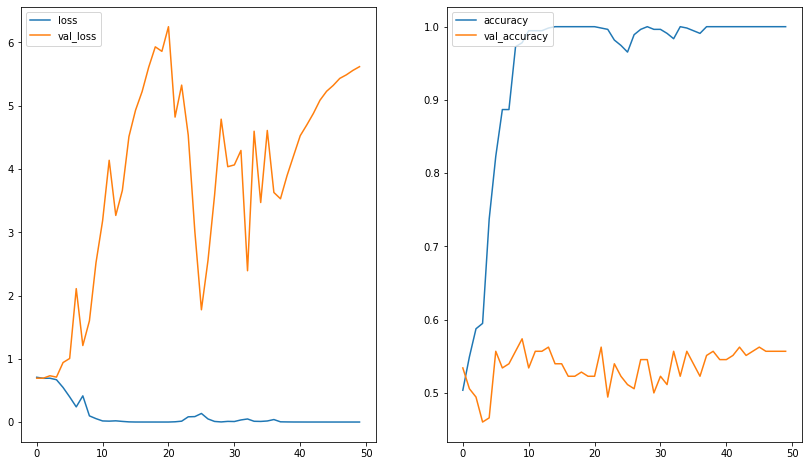

In [ ]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

## A Simple Model With Simple Callback


As the epochs go by, the algorithm leans and its error on the training set naturally goes down, and so does its error on the validation set. However, after a while, the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With Early Stopping, you just stop training as soon as the validation error reaches the minimum.




### Build the Model




In [ ]:
model_cb = Sequential()

model_cb.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu'))

model_cb.add(MaxPooling2D(2))

model_cb.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model_cb.add(MaxPooling2D(2))

model_cb.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model_cb.add(Flatten())
model_cb.add(Dense(units=264, activation='relu'))
model_cb.add(Dense(units=512, activation='relu'))
model_cb.add(Dense(units=1, activation = 'sigmoid'))
model_cb.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 264)              

### Compile the Model




In [ ]:
model_cb.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

### Instantiating the Callback

Let's instantitate the `EarlyCallback` as follows:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience = 3,
                               verbose = 1)

### Training the Model Using the Callback

Next, we just need to pass the callback object to `model.fit()` method. The `early_stopping` get passed in a list to the callbacks argument. It is a list because in practice we might be passing a number of callbacks for performing different tasks, for example debugging and learning rate scheduler.



In [ ]:
history_cb = model_cb.fit(train_it, validation_data=test_it, epochs=50,
                    callbacks = [early_stopping])

Epoch 1/50
18/18 [==============================] - 46s 3s/step - loss: 0.8016 - accuracy: 0.4708 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 45s 2s/step - loss: 0.6946 - accuracy: 0.5201 - val_loss: 0.6926 - val_accuracy: 0.4943
Epoch 3/50
18/18 [==============================] - 45s 2s/step - loss: 0.6898 - accuracy: 0.5584 - val_loss: 0.6906 - val_accuracy: 0.5227
Epoch 4/50
18/18 [==============================] - 44s 2s/step - loss: 0.6714 - accuracy: 0.5876 - val_loss: 0.7066 - val_accuracy: 0.4943
Epoch 5/50
18/18 [==============================] - 45s 2s/step - loss: 0.6352 - accuracy: 0.6533 - val_loss: 0.7327 - val_accuracy: 0.5057
Epoch 6/50
18/18 [==============================] - 45s 2s/step - loss: 0.5864 - accuracy: 0.7062 - val_loss: 0.7956 - val_accuracy: 0.5227
Epoch 00006: early stopping


The training gets terminated at Epoch 5 due to the increase of `val_loss` value and that is exactly the conditions `monitor='val_loss'` and `patience=3`.

It’s often more convenient to look at a plot.

### Plotting History

Let's plot history and see

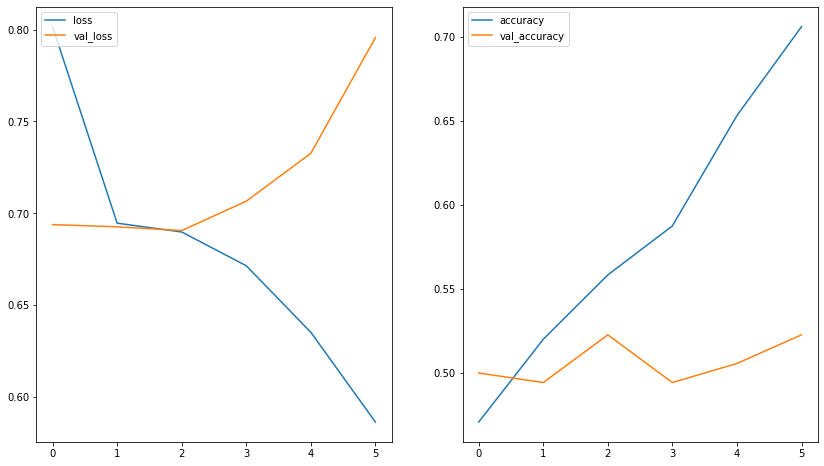

In [ ]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history_cb.history['loss'], label='loss')
plt.plot(history_cb.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_cb.history['accuracy'],label='accuracy')
plt.plot(history_cb.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

## Customizing Early Stopping

Apart from the options monitor and patience we mentioned early, the other 2 options `min_delta` and `mode` are likely to be used quite often.

**monitor='val_loss':** to use validation loss as performance measure to terminate the training.

**patience=0:** is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.

**min_delta:** Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than `min_delta`, will count as no improvement.

**mode='auto':** Should be one of auto, min or max. In 'min' mode, training will stop when the quantity monitored has stopped decreasing; in 'max' mode it will stop when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.

### Instantiating Custom Callback


In [ ]:
custome_early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.001,
    patience = 5, 
    verbose = 2,
    mode = 'auto'
)

### Training the Model with Custom Callback



In [ ]:
history_custom_cb = model_cb.fit(train_it, validation_data = test_it,
                                 epochs = 50,
                                 callbacks = [custome_early_stopping])

Epoch 1/50
18/18 [==============================] - 45s 3s/step - loss: 0.5018 - accuracy: 0.7464 - val_loss: 0.8339 - val_accuracy: 0.4943
Epoch 2/50
18/18 [==============================] - 45s 3s/step - loss: 0.3488 - accuracy: 0.8248 - val_loss: 0.9817 - val_accuracy: 0.5227
Epoch 3/50
18/18 [==============================] - 45s 2s/step - loss: 0.1927 - accuracy: 0.9361 - val_loss: 1.7821 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 45s 2s/step - loss: 0.1281 - accuracy: 0.9507 - val_loss: 1.8273 - val_accuracy: 0.5227
Epoch 5/50
18/18 [==============================] - 45s 2s/step - loss: 0.0442 - accuracy: 0.9872 - val_loss: 2.2684 - val_accuracy: 0.5455
Epoch 6/50
18/18 [==============================] - 45s 2s/step - loss: 0.0194 - accuracy: 0.9927 - val_loss: 2.7884 - val_accuracy: 0.5511
Epoch 00006: early stopping


### Plotting History

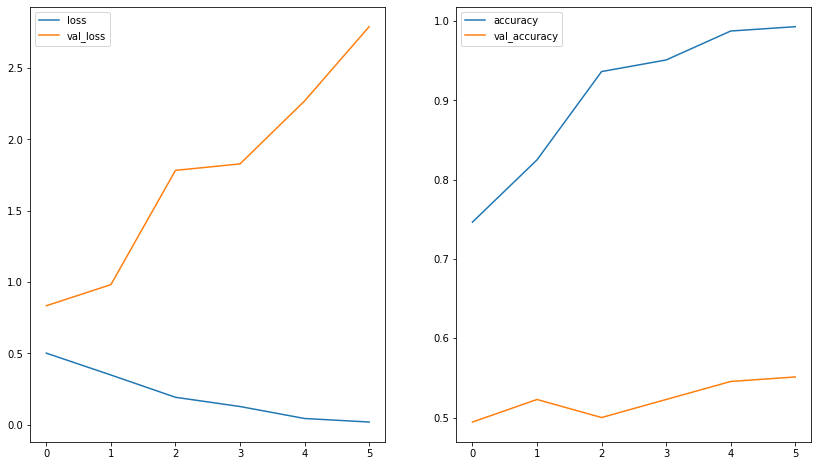

In [ ]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history_custom_cb.history['loss'], label='loss')
plt.plot(history_custom_cb.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_custom_cb.history['accuracy'],label='accuracy')
plt.plot(history_custom_cb.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

## Customizing EarlyStopping for Accuracy


In [15]:
model_acc = Sequential()

model_acc.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu'))

model_acc.add(MaxPooling2D(2))

model_acc.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model_acc.add(MaxPooling2D(2))

model_acc.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model_acc.add(Flatten())
model_acc.add(Dense(units=264, activation='relu'))
model_acc.add(Dense(units=512, activation='relu'))
model_acc.add(Dense(units=1, activation = 'sigmoid'))
model_acc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 264)              

### Compiling the Model

In [19]:
model_acc.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'])

# Intantiating the Callback

Let's assume we want our model to train untill it reaches $95\%$ accuracy. To do so, we need to create a custom callback.

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs ={}):
    if(logs.get('accuracy')>0.93):
      print("\Reached 93% accuracy so cancelling training.")
      self.model.stop_training = True
    

earlystopping_acc = myCallback()

### Training the Model

In [21]:
history_acc = model_acc.fit(train_it, validation_data = test_it,
                                 epochs = 50,
                                 callbacks = [earlystopping_acc])

Epoch 1/50
18/18 [==============================] - 261s 13s/step - loss: 0.7196 - accuracy: 0.4763 - val_loss: 0.6930 - val_accuracy: 0.5341
Epoch 2/50
18/18 [==============================] - 3s 160ms/step - loss: 0.6975 - accuracy: 0.5018 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/50
18/18 [==============================] - 3s 160ms/step - loss: 0.6924 - accuracy: 0.5146 - val_loss: 0.6939 - val_accuracy: 0.4773
Epoch 4/50
18/18 [==============================] - 3s 159ms/step - loss: 0.6936 - accuracy: 0.5328 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
18/18 [==============================] - 3s 160ms/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 6/50
18/18 [==============================] - 3s 160ms/step - loss: 0.6950 - accuracy: 0.5310 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 7/50
18/18 [==============================] - 3s 159ms/step - loss: 0.9158 - accuracy: 0.6460 - val_loss: 0.6898 - val_accuracy: 0.5625
Epoch 

### Plotting History



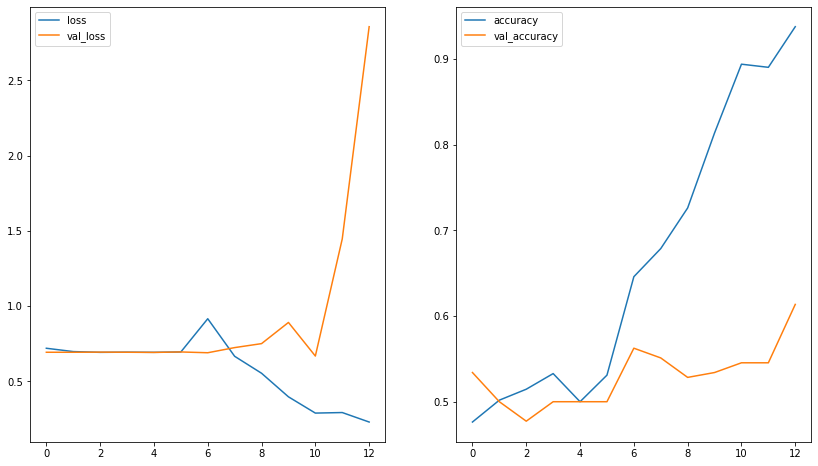

In [22]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history_acc.history['loss'], label='loss')
plt.plot(history_acc.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_acc.history['accuracy'],label='accuracy')
plt.plot(history_acc.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

# References

1. [A Guide to TensorFlow Callbacks](https://blog.paperspace.com/tensorflow-callbacks/)
2. [Writing your own callbacks](https://www.tensorflow.org/guide/keras/custom_callback)
3. [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)
4. [A Practical Introduction to Keras Callbacks in TensorFlow 2](https://towardsdatascience.com/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966)
5. [How to use TensorFlow callbacks?](https://medium.com/ydata-ai/how-to-use-tensorflow-callbacks-f54f9bb6db25)
6. [Callbacks in Tensor Flow](https://sailajakarra.medium.com/callbacks-in-tensor-flow-f8e7f9996f5f)
7. [Keras Callbacks Explained In Three Minutes](https://www.kdnuggets.com/2019/08/keras-callbacks-explained-three-minutes.html)
